In [1]:
#path_main_summarized_table = "../datasets/2023-01-01_benchmark_processed_data/2023-01-27_FullTableAurocFiltered.tsv"
path_main_summarized_table = "../results/2023-05-24/00_processed/main/aurocs.tsv.gz"

path_config_viz = "../config/visualization.yaml"
path_output_dir = "./main.performance_comparisons/"
export_plots = True


# Forewords

Main plots composing figure 2.

# Imports

In [2]:
import copy
import os
import sys
from pathlib import Path

import pandas as pd
import polars as pl
import numpy as np
import yaml
import scipy.stats

from dotmap import DotMap


path = "../code/"
if not str(path) in sys.path:
    sys.path.insert(0, str(path))

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from plotting_config import *

%run "../code/plotting_config.py"
%run "../code/figure_layouts.py"

/home/l10n/projects/hzm/Benchmark-RBP/analyses/code/figure_layouts.py:99: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


# Set-up

In [3]:
if export_plots:
    if not Path(path_output_dir).exists():
        Path(path_output_dir).mkdir(parents=True, exist_ok=True)

# Load

## Params

In [4]:
with open(path_config_viz, "r") as in_f:
    config_viz = yaml.load(in_f, Loader=yaml.SafeLoader)


DATASETS_COLORS = config_viz["datasets"]["colors"]
DATASETS_dotshape = config_viz["datasets"]["shape"]
arch_colors = config_viz["methods"]["colors"]


## Data

In [5]:
full_summary_table = pd.read_csv(
    path_main_summarized_table,
    header=0,
    index_col=None,
    sep="\t"
)

# Explore

## Across methods, across datasets

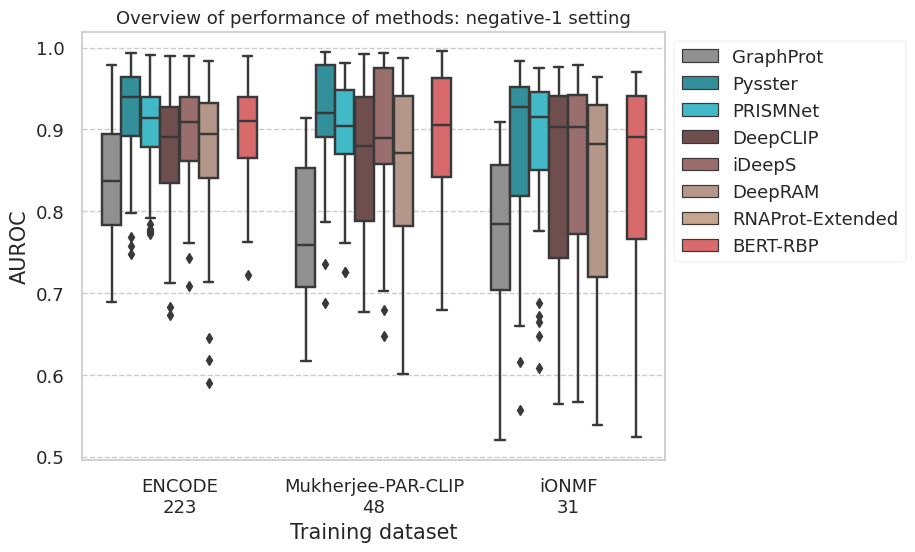

In [7]:
NEGATIVE_SET = "negative-1"
panel_name = "a"  # This is used to get dimensions of the figure.

LIST_METHODS = ['GraphProt','Pysster','PRISMNet','DeepCLIP','iDeepS','DeepRAM','RNAProt-Extended','BERT-RBP']

if NEGATIVE_SET == "negative-2":
    LIST_METHODS += ['DeepRiPe','Multi-resBind','MultiRBP']

figure_name = f"boxplot_performance_comparisons.{NEGATIVE_SET}"

if export_plots:
    savefig_file = str(Path(path_output_dir) / f"{figure_name}.{{EXT}}")
else:
    savefig_file = None 


sub_table = full_summary_table.loc[
    lambda df: (df['model_negativeset'] == NEGATIVE_SET) & df['arch'].isin(LIST_METHODS),
:]

fig = plt.figure(figsize=[v*3 for v in FIG2_PANEL_SIZES[panel_name]])
ax1 = fig.add_subplot(1,1,1)


sns.boxplot(
    data=sub_table,
    y='auroc',
    x='dataset',
    hue='arch',
    palette=arch_colors,
    hue_order=[arch for arch in LIST_METHODS],
    ax=ax1
)

ax1.legend(bbox_to_anchor=(1,1))

# Rename so as to show number of models
rename_datasets = sub_table.groupby('dataset').apply(
    lambda group: f"{group.name}\n{group['RBP_dataset'].unique().shape[0]:,}"
).to_dict()

ax1.set_xlabel('Training dataset')
ax1.set_ylabel('AUROC')
ax1.set_title(f"Overview of performance of methods: {NEGATIVE_SET} setting")

ax1.set_xticklabels([rename_datasets.get(tick.get_text(), tick.get_text()) for tick in ax1.get_xticklabels()])

fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(right=0.75)

plt.tight_layout()

if savefig_file is not None:
    my_savefig(savefig_file, ext_list=['png','svg','pdf'])

plt.show()



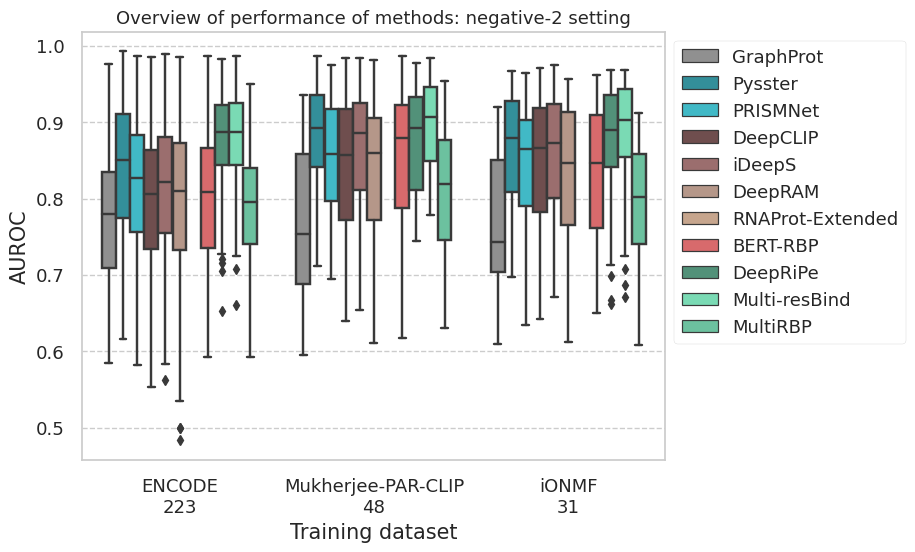

In [6]:
NEGATIVE_SET = "negative-2"
panel_name = "a"  # This is used to get dimensions of the figure.

LIST_METHODS = ['GraphProt','Pysster','PRISMNet','DeepCLIP','iDeepS','DeepRAM','RNAProt-Extended','BERT-RBP']

if NEGATIVE_SET == "negative-2":
    LIST_METHODS += ['DeepRiPe','Multi-resBind','MultiRBP']

figure_name = f"boxplot_performance_comparisons.{NEGATIVE_SET}"

if export_plots:
    savefig_file = str(Path(path_output_dir) / f"{figure_name}.{{EXT}}")
else:
    savefig_file = None 


sub_table = full_summary_table.loc[
    lambda df: (df['model_negativeset'] == NEGATIVE_SET) & df['arch'].isin(LIST_METHODS),
:]

fig = plt.figure(figsize=[v*3 for v in FIG2_PANEL_SIZES[panel_name]])
ax1 = fig.add_subplot(1,1,1)


sns.boxplot(
    data=sub_table,
    y='auroc',
    x='dataset',
    hue='arch',
    palette=arch_colors,
    hue_order=[arch for arch in LIST_METHODS],
    ax=ax1
)

ax1.legend(bbox_to_anchor=(1,1))

# Rename so as to show number of models
rename_datasets = sub_table.groupby('dataset').apply(
    lambda group: f"{group.name}\n{group['RBP_dataset'].unique().shape[0]:,}"
).to_dict()

ax1.set_xlabel('Training dataset')
ax1.set_ylabel('AUROC')
ax1.set_title(f"Overview of performance of methods: {NEGATIVE_SET} setting")

ax1.set_xticklabels([rename_datasets.get(tick.get_text(), tick.get_text()) for tick in ax1.get_xticklabels()])

fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(right=0.75)

plt.tight_layout()

if savefig_file is not None:
    my_savefig(savefig_file, ext_list=['png','svg','pdf'])

plt.show()



## Negative 1 vs negative 2

In [8]:
LIST_METHODS = ['GraphProt','Pysster','PRISMNet','DeepCLIP','iDeepS','DeepRAM','RNAProt-Extended','BERT-RBP']

In [9]:
tmp_neg1_neg2 = full_summary_table.loc[
    lambda df: df['arch'].isin(LIST_METHODS),:
].pivot_table(
    columns = ['model_negativeset'],
    values='auroc',
    index=['arch','dataset','RBP_dataset'],
).dropna().reset_index()

tmp_neg1_neg2 = tmp_neg1_neg2.rename(columns = {'arch':'Method','dataset':'Dataset',})

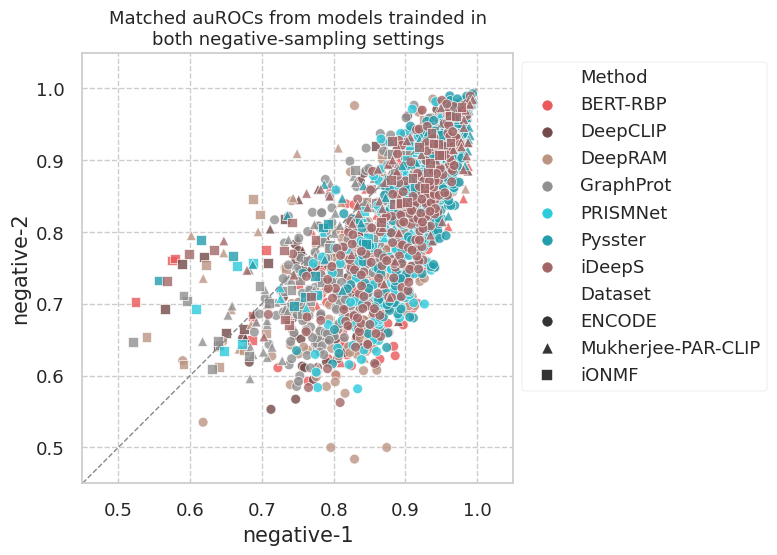

In [10]:
panel_name = 'd' 

figure_name = "scatterplot_neg1neg2_performance_comparisons"

if export_plots:
    savefig_file = str(Path(path_output_dir) / f"{figure_name}.{{EXT}}")
else:
    savefig_file = None

fig = plt.figure(figsize=[v*4.5 for v in FIG2_PANEL_SIZES[panel_name]])
ax1 = fig.add_subplot(1,1,1)

sns.scatterplot(
    data=tmp_neg1_neg2,
    x='negative-1',
    y='negative-2',
    hue='Method',
    palette=arch_colors,
    style='Dataset',
    markers=DATASETS_dotshape,
    s=50,
    alpha=0.8,
    ax=ax1,
)

ax1.set_aspect('equal')
ax1.plot([0,1],[0,1], color='#888888', linestyle='--', linewidth=1)
ax1.set_xlim(0.45, 1.05)
ax1.set_ylim(0.45, 1.05)


title = ("Matched auROCs from models trainded in\n"
            "both negative-sampling settings")
ax1.set_title(title)

ax1.legend(bbox_to_anchor=(1,1))

fig.subplots_adjust(right=0.55)

plt.tight_layout()

if savefig_file is not None:
    my_savefig(savefig_file, ext_list=['png','svg','pdf'])

plt.show()

## Multilabel models

Here we compare the performance of multi-label models in their original implementation (i.e. as displayed in the "negative-2" boxplot), with new models where we added a new label corresponding to "negative-1".

This enables the models to classify ubound regions.

Of note: MultiRBP performed poorly in the negative-2 settings. We thus focus on DeepRiPe and Multi-resBind.

## Multi-resBind

In [12]:
tmp_multiresbind = full_summary_table.loc[
    lambda df: df['arch'].isin(['Multi-resBind','Multi-resBind-1']),:
].pivot_table(
    columns=['arch'],
    index=['dataset','RBP_dataset',],
    values='auroc',
).dropna().reset_index()

tmp_multiresbind['delta_auroc_neg2'] = (
    tmp_multiresbind['Multi-resBind-1'] - tmp_multiresbind['Multi-resBind']
)

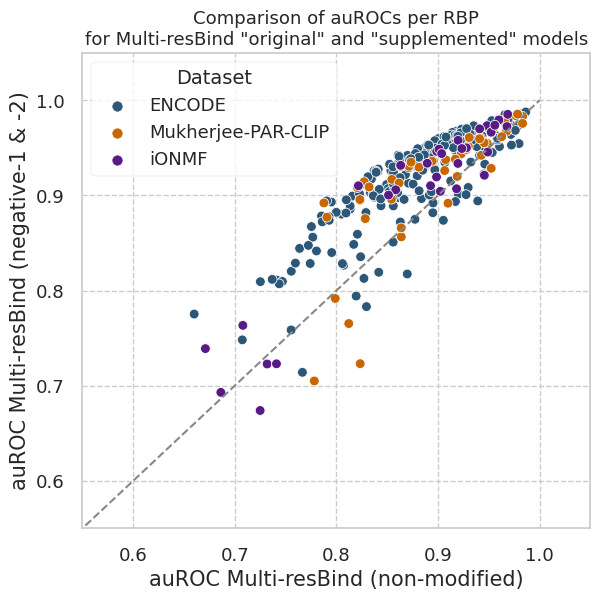

In [19]:
panel_name = "e" 
figure_name = "scatterplot.multilabel_neg1neg2_aurocs.Multi-resBind"

if export_plots:
    savefig_file = str(Path(path_output_dir) / f"{figure_name}.{{EXT}}")
else:
    savefig_file = None

scaling_factor = 3.5
fig = plt.figure(figsize=[v*scaling_factor for v in FIG2_PANEL_SIZES[panel_name]])
ax1 = fig.add_subplot(1,1,1)

sns.scatterplot(
    data=tmp_multiresbind,
    x="Multi-resBind",
    y="Multi-resBind-1",
    hue="dataset",
    palette=DATASETS_COLORS,
    ax=ax1,
)

ax1.plot([0,1], [0,1], linestyle='--', color='#888888', linewidth=1.5)
ax1.set_xlim(0.55, 1.05)
ax1.set_ylim(0.55, 1.05)

ax1.legend_.set_title("Dataset")
plt.setp(ax1.legend_.get_title(), fontsize=14)

ax1.set_xlabel("auROC Multi-resBind (non-modified)")
ax1.set_ylabel("auROC Multi-resBind (negative-1 & -2)")

title = ("Comparison of auROCs per RBP\n"
            "for Multi-resBind \"original\" and \"supplemented\" models"
            )
ax1.set_title(title)

fig.subplots_adjust(left=0.15)
plt.tight_layout()

if savefig_file:
    my_savefig(savefig_file, ext_list=['png','svg','pdf'])

plt.show()


## DeepRiPe

In [16]:

tmp_deepripe = full_summary_table.loc[
    lambda df: df['arch'].isin(['DeepRiPe','DeepRiPe-1']),:
].pivot_table(
    columns=['arch'],
    index=['dataset','RBP_dataset',],
    values='auroc',
).dropna().reset_index()

tmp_deepripe['delta_auroc_neg2'] = (
    tmp_deepripe['DeepRiPe-1'] - tmp_deepripe['DeepRiPe']
)

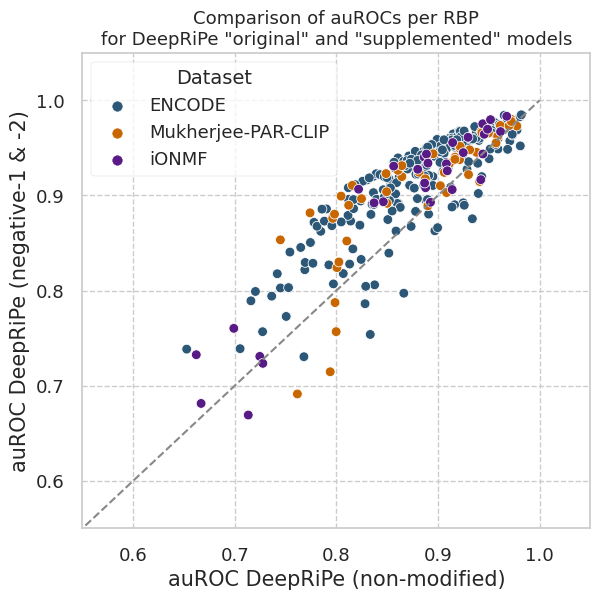

In [18]:
panel_name = "e" 
figure_name = "scatterplot.multilabel_neg1neg2_aurocs.DeepRiPe"

if export_plots:
    savefig_file = str(Path(path_output_dir) / f"{figure_name}.{{EXT}}")
else:
    savefig_file = None

scaling_factor = 3.5
fig = plt.figure(figsize=[v*scaling_factor for v in FIG2_PANEL_SIZES[panel_name]])
ax1 = fig.add_subplot(1,1,1)

sns.scatterplot(
    data=tmp_deepripe,
    x="DeepRiPe",
    y="DeepRiPe-1",
    hue="dataset",
    palette=DATASETS_COLORS,
    ax=ax1,
)

ax1.plot([0,1], [0,1], linestyle='--', color='#888888', linewidth=1.5)

ax1.set_xlim(0.55, 1.05)
ax1.set_ylim(0.55, 1.05)

ax1.legend_.set_title("Dataset")
plt.setp(ax1.legend_.get_title(), fontsize=14)

ax1.set_xlabel("auROC DeepRiPe (non-modified)")
ax1.set_ylabel("auROC DeepRiPe (negative-1 & -2)")

title = ("Comparison of auROCs per RBP\n"
            "for DeepRiPe \"original\" and \"supplemented\" models"
            )
ax1.set_title(title)

fig.subplots_adjust(left=0.15)
plt.tight_layout()

if savefig_file:
    my_savefig(savefig_file, ext_list=['png','svg','pdf'])

plt.show()
